# HW 11 - Assignment 2

### Importing packages

In [33]:
import os
import geopandas as gpd
import zipfile as zp
import pandas as pd
import json
import urllib as ulr
import numpy as np
import shapely
from shapely.geometry import Point
from shapely.geometry import Polygon
from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn.cluster
from sklearn import mixture
%matplotlib inline
import matplotlib.pylab as plt


### Downloading business zip data

In [2]:
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/1993/zbp93totals.zip'
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/1994/zbp94totals.zip'
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/1995/zbp95totals.zip'
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/1996/zbp96totals.zip'
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/1997/zbp97totals.zip'
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/1998/zbp98totals.zip'
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/1999/zbp99totals.zip'
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/2000/zbp00totals.zip'
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/2001/zbp01totals.zip'
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/2002/zbp02totals.zip'
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/2003/zbp03totals.zip'
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/2004/zbp04totals.zip'
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/2005/zbp05totals.zip'
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/2006/zbp06totals.zip'
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/2007/zbp07totals.zip'
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/2008/zbp08totals.zip'
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/2009/zbp09totals.zip'
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/2010/zbp10totals.zip'
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/2011/zbp11totals.zip'
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/2012/zbp12totals.zip'
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/2013/zbp13totals.zip'
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/2014/zbp14totals.zip'
!curl -O 'http://www2.census.gov/programs-surveys/cbp/datasets/2015/zbp15totals.zip'


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  139k    0  139k    0     0   821k      0 --:--:-- --:--:-- --:--:--  863k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  597k  100  597k    0     0  19.9M      0 --:--:-- --:--:-- --:--:-- 24.2M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  610k  100  610k    0     0  18.8M      0 --:--:-- --:--:-- --:--:-- 22.9M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  617k  100  617k    0     0  19.0M      0 --:--:-- --:--:-- --:--:-- 23.2M
  % Total    % Received % Xferd  Average Speed   Tim

In [3]:
os.system('mkdir data')

256

In [4]:
os.system('mv zbp**totals.zip data')

0

### Upload the data with pandas

In [5]:
zf94 = zp.ZipFile('data/zbp94totals.zip')
zf95 = zp.ZipFile('data/zbp95totals.zip')
zf96 = zp.ZipFile('data/zbp96totals.zip')
zf97 = zp.ZipFile('data/zbp97totals.zip')
zf98 = zp.ZipFile('data/zbp98totals.zip')
zf99 = zp.ZipFile('data/zbp99totals.zip')
zf00 = zp.ZipFile('data/zbp00totals.zip')
zf01 = zp.ZipFile('data/zbp01totals.zip')
zf02 = zp.ZipFile('data/zbp02totals.zip')
zf03 = zp.ZipFile('data/zbp03totals.zip')
zf04 = zp.ZipFile('data/zbp04totals.zip')
zf05 = zp.ZipFile('data/zbp05totals.zip')
zf06 = zp.ZipFile('data/zbp06totals.zip')
zf07 = zp.ZipFile('data/zbp07totals.zip')
zf08 = zp.ZipFile('data/zbp08totals.zip')
zf09 = zp.ZipFile('data/zbp09totals.zip')
zf10 = zp.ZipFile('data/zbp10totals.zip')
zf11 = zp.ZipFile('data/zbp11totals.zip')
zf12 = zp.ZipFile('data/zbp12totals.zip')
zf13 = zp.ZipFile('data/zbp13totals.zip')
zf14 = zp.ZipFile('data/zbp14totals.zip')


In [6]:
df_94 = pd.read_csv(zf94.open('zbp94totals.zip'.replace('.zip','.txt')))
df_95 = pd.read_csv(zf95.open('zbp95totals.zip'.replace('.zip','.txt')))
df_96 = pd.read_csv(zf96.open('zbp96totals.zip'.replace('.zip','.txt')))
df_97 = pd.read_csv(zf97.open('zbp97totals.zip'.replace('.zip','.txt')))
df_98 = pd.read_csv(zf98.open('zbp98totals.zip'.replace('.zip','.txt')))
df_99 = pd.read_csv(zf99.open('zbp99totals.zip'.replace('.zip','.txt')))
df_00 = pd.read_csv(zf00.open('zbp00totals.zip'.replace('.zip','.txt')))
df_01 = pd.read_csv(zf01.open('zbp01totals.zip'.replace('.zip','.txt')))
df_02 = pd.read_csv(zf02.open('zbp02totals.zip'.replace('.zip','.txt')))
df_03 = pd.read_csv(zf03.open('zbp03totals.zip'.replace('.zip','.txt')))
df_04 = pd.read_csv(zf04.open('zbp04totals.zip'.replace('.zip','.txt')))
df_05 = pd.read_csv(zf05.open('zbp05totals.zip'.replace('.zip','.txt')))
df_06 = pd.read_csv(zf06.open('zbp06totals.zip'.replace('.zip','.txt')))
df_07 = pd.read_csv(zf07.open('zbp07totals.zip'.replace('.zip','.txt')))
df_08 = pd.read_csv(zf08.open('zbp08totals.zip'.replace('.zip','.txt')))
df_09 = pd.read_csv(zf09.open('zbp09totals.zip'.replace('.zip','.txt')))
df_10 = pd.read_csv(zf10.open('zbp10totals.zip'.replace('.zip','.txt')))
df_11 = pd.read_csv(zf11.open('zbp11totals.zip'.replace('.zip','.txt')))
df_12 = pd.read_csv(zf12.open('zbp12totals.zip'.replace('.zip','.txt')))
df_13 = pd.read_csv(zf13.open('zbp13totals.zip'.replace('.zip','.txt')))
df_14 = pd.read_csv(zf14.open('zbp14totals.zip'.replace('.zip','.txt')))


### Downloading geojson data and munging it

In [7]:
url = "https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/HW11_fb55/nyc-zip-code-tabulation-areas-polygons.geojson" 
response = ulr.urlopen(url)
data = response.read().decode("utf-8")
data = json.loads(data)

In [8]:
def great_NM_HH_function (json):
    """
    A function that retrieves information needed from the json data file and creates a dataframe
    """
    df=pd.DataFrame()
    df['geometry']=[]
    df['PO_NAME']=[]
    df['Shape_Leng']=[]
    df['Shape_Area']=[]
    df['borough']=[]
    df['postalCode']=[]
    
    for i in range(262):
        df = df.append({'geometry': Polygon(data['features'][i]['geometry']['coordinates'][0]),
                        'PO_NAME' : data['features'][i]['properties']['PO_NAME'],
                        'Shape_Area' : data['features'][i]['properties']['Shape_Area'],
                        'Shape_Leng' : data['features'][i]['properties']['Shape_Leng'],
                        'borough' : data['features'][i]['properties']['borough'],
                        'postalCode' : data['features'][i]['properties']['postalCode']
                       },ignore_index=True)

    return df


In [9]:
geo_df=great_NM_HH_function(data['features'])

In [10]:
geo_df=gpd.GeoDataFrame(geo_df)

In [11]:
geo_df.columns=['geometry', 'PO_NAME', 'Shape_Leng', 'Shape_Area', 'borough',
       'zip']

### Getting business zip data ready for merging

In [12]:
# selecting columns of interest
df_94=df_94.iloc[:,[0,6]]
df_95=df_95.iloc[:,[0,6]]
df_96=df_96.iloc[:,[0,6]]
df_97=df_97.iloc[:,[0,6]]
df_98=df_98.iloc[:,[0,6]]
df_99=df_99.iloc[:,[0,6]]
df_00=df_00.iloc[:,[0,6]]
df_01=df_01.iloc[:,[0,6]]
df_02=df_02.iloc[:,[0,6]]
df_03=df_03.iloc[:,[0,6]]
df_04=df_04.iloc[:,[0,6]]
df_05=df_05.iloc[:,[0,6]]
df_06=df_06.iloc[:,[0,6]]
df_07=df_07.iloc[:,[0,9]]
df_08=df_08.iloc[:,[0,9]]
df_09=df_09.iloc[:,[0,9]]
df_10=df_10.iloc[:,[0,9]]
df_11=df_11.iloc[:,[0,9]]
df_12=df_12.iloc[:,[0,9]]
df_13=df_13.iloc[:,[0,9]]
df_14=df_14.iloc[:,[0,9]]

In [13]:
# setting the same format for all names
df_98.columns=['zip','est']
df_99.columns=['zip','est']
df_00.columns=['zip','est']
df_01.columns=['zip','est']
df_02.columns=['zip','est']

### Merging data

In [14]:
# creating a list from all business zip dataframes
lis=[df_94,df_95,df_96,df_97,df_98,df_99,df_00,df_01,df_02,df_03,df_04,
     df_05,df_06,df_07,df_08,df_09,df_10,df_11,df_12,df_13,df_14]


In [15]:
# merging
for i in lis:
    if 'zip' in i.columns:
        i['zip']=i['zip'].astype(str)
        geo_df = pd.merge(left = geo_df, 
                             right= i, 
                             how = 'left', 
                             on = 'zip')
   
    

In [16]:
# creating a list to rename columns of dataframe
colums=['geometry', 'PO_NAME', 'Shape_Leng', 'Shape_Area', 'borough', 'zip']
years=range(1994,2015)
for i in years:
    colums.append(str(i))

In [17]:
geo_df.columns=colums

In [18]:
geo_df.head()

,geometry,PO_NAME,Shape_Leng,Shape_Area,borough,zip,1994,1995,1996,1997,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,POLYGON ((-73.86942457284175 40.74915687096787...,Jackson Heights,20624.692317,2.016328e+07,Queens,11372,1229.0,1236.0,1292.0,1309.0,...,1539.0,1527.0,1545.0,1538.0,1572.0,1629.0,1647.0,1724.0,1759.0,1768.0
1,POLYGON ((-73.71068374074007 40.75004039450917...,Glen Oaks,23002.816039,2.260653e+07,Queens,11004,194.0,188.0,176.0,192.0,...,225.0,226.0,238.0,227.0,233.0,229.0,222.0,241.0,241.0,250.0
2,POLYGON ((-73.70098278625547 40.73889569923034...,New Hyde Park,15749.161511,6.269333e+06,Queens,11040,1422.0,1414.0,1335.0,1344.0,...,1441.0,1454.0,1488.0,1503.0,1475.0,1494.0,1488.0,1510.0,1539.0,1534.0
3,POLYGON ((-73.72270447144122 40.75373371438336...,Bellerose,35932.810639,4.941836e+07,Queens,11426,326.0,219.0,209.0,198.0,...,226.0,226.0,228.0,226.0,237.0,248.0,256.0,266.0,258.0,260.0
4,POLYGON ((-73.81088634744755 40.72717187575918...,Fresh Meadows,38693.565676,6.938587e+07,Queens,11365,492.0,476.0,483.0,522.0,...,604.0,608.0,617.0,616.0,628.0,643.0,677.0,679.0,714.0,731.0


In [19]:
geo_df.iloc[:, 6:].describe()
#describe()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,255.000000,251.000000,252.000000,252.000000,252.000000,249.000000,253.000000,253.000000,252.000000,252.000000,...,254.000000,255.000000,256.000000,253.000000,253.000000,254.000000,253.000000,251.000000,251.000000,250.000000
mean,753.301961,780.446215,787.369048,806.873016,818.666667,834.686747,835.936759,835.790514,844.833333,854.678571,...,867.700787,869.533333,872.996094,889.162055,893.723320,903.842520,918.881423,942.980080,960.924303,979.932000
std,1126.814763,1159.086499,1160.771736,1185.509721,1196.503868,1198.974454,1215.367687,1219.853192,1185.377532,1185.936198,...,1210.201625,1216.154349,1199.140913,1199.305114,1184.002565,1184.687564,1190.480549,1204.430141,1216.102978,1226.936034
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,6999.000000,7088.000000,7075.000000,7154.000000,7254.000000,7233.000000,7317.000000,7188.000000,7141.000000,7084.000000,...,7312.000000,7415.000000,7549.000000,7472.000000,7305.000000,7241.000000,7227.000000,7235.000000,7273.000000,7369.000000


### Whitening the data

In [20]:
for year in geo_df.iloc[:, 6:]:
    for i in range(0, len(geo_df)):
        geo_df[year][i] = ((geo_df[year][i] - geo_df[year].mean()) / geo_df[year].std())

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [21]:
geo_df.head()

,geometry,PO_NAME,Shape_Leng,Shape_Area,borough,zip,1994,1995,1996,1997,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,POLYGON ((-73.86942457284175 40.74915687096787...,Jackson Heights,20624.692317,2.016328e+07,Queens,11372,0.422162,0.393028,0.434737,0.423554,...,0.554700,0.540611,0.560404,0.541012,0.572868,0.612109,0.611617,0.648456,0.656257,0.642306
1,POLYGON ((-73.71068374074007 40.75004039450917...,Glen Oaks,23002.816039,2.260653e+07,Queens,11004,-0.491826,-0.506587,-0.522000,-0.513992,...,-0.525857,-0.524013,-0.524297,-0.546783,-0.552540,-0.564004,-0.579667,-0.576919,-0.586016,-0.588905
2,POLYGON ((-73.70098278625547 40.73889569923034...,New Hyde Park,15749.161511,6.269333e+06,Queens,11040,0.597849,0.550958,0.476376,0.457671,...,0.479054,0.485816,0.518214,0.517139,0.496484,0.503876,0.483817,0.476844,0.481463,0.457708
3,POLYGON ((-73.72270447144122 40.75373371438336...,Bellerose,35932.810639,4.941836e+07,Queens,11426,-0.368922,-0.474045,-0.488033,-0.503360,...,-0.519101,-0.518099,-0.526503,-0.541371,-0.542857,-0.541642,-0.544800,-0.549678,-0.565482,-0.574147
4,POLYGON ((-73.81088634744755 40.72717187575918...,Fresh Meadows,38693.565676,6.938587e+07,Queens,11365,-0.220497,-0.251732,-0.251477,-0.229694,...,-0.206358,-0.203607,-0.201713,-0.215824,-0.212243,-0.207789,-0.190771,-0.206340,-0.190182,-0.190005


In [22]:
geo_df.iloc[:, 6:].mean()

1994    0.773241
1995    0.766681
1996    0.785010
1997    0.800471
1998    0.795113
1999    0.805850
2000    0.859727
2001    0.868568
2002    0.887269
2003    0.891574
2004    0.882743
2005    0.846061
2006    0.867578
2007    0.892123
2008    0.904146
2009    0.928636
2010    0.925212
2011    0.932719
2012    0.941984
2013    0.947037
2014    0.961125
dtype: float64

In [23]:
geo_df.iloc[:, 6:].std()

1994    2.011375
1995    2.015350
1996    2.039033
1997    2.130678
1998    2.125079
1999    2.145035
2000    2.297194
2001    2.317076
2002    2.294902
2003    2.285603
2004    2.196610
2005    2.077841
2006    2.085088
2007    2.252537
2008    2.282440
2009    2.325688
2010    2.307882
2011    2.318264
2012    2.320021
2013    2.314552
2014    2.341915
dtype: float64

### Clustering

In [24]:
geo_df.dropna(inplace=True)

In [25]:
scaled_data = geo_df.iloc[:, 6:]

In [35]:
# calculate silhouette score for deciding no. clusters
X=scaled_data
range_n_clusters = [3, 4, 5, 6, 7, 8, 9]
for n_clusters in range_n_clusters:
    km = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=324) #the clustering model we choose (HH)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =3, the average silhouette_score is :0.753489486768
For n_clusters =4, the average silhouette_score is :0.671902442094
For n_clusters =5, the average silhouette_score is :0.594185016254
For n_clusters =6, the average silhouette_score is :0.61120128493
For n_clusters =7, the average silhouette_score is :0.606026607773
For n_clusters =8, the average silhouette_score is :0.618105892432
For n_clusters =9, the average silhouette_score is :0.622254575343


We go with 3 clusters according to the calculated silhouette score

In [36]:
n=3 # number of clusters.

#Kmeans
import sklearn.cluster as cluster
KM=cluster.KMeans(n_clusters=n)
KM.fit(scaled_data)
res_KM=KM.predict(scaled_data)

#merge the result with zipcodes for graph plotting
res_KM=pd.concat((geo_df.loc[:, 'zip'],pd.DataFrame(res_KM)),axis=1)
res_KM.columns = ['zip', 'cluster']
res_KM.head()

,zip,cluster
0,11372,1.0
1,11004,1.0
2,11040,1.0
3,11426,1.0
4,11365,1.0


In [37]:
print 'Number of zipcodes in first cluster: %d' %res_KM.groupby('cluster').size()[0]
print 'Number of zipcodes in second cluster: %d' %res_KM.groupby('cluster').size()[1]
print 'Number of zipcodes in third cluster: %d' %res_KM.groupby('cluster').size()[2]

Number of zipcodes in first cluster: 28
Number of zipcodes in second cluster: 211
Number of zipcodes in third cluster: 4


In [38]:
# merging cluster info
geo_df = pd.merge(left=geo_df, right=res_KM, how='left', on='zip')

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/cbook.py:2644: UserWarning: Saw kwargs [u'c', u'color'] which are all aliases for u'color'.  Kept value from u'color'
  seen=seen, canon=canonical, used=seen[-1]))


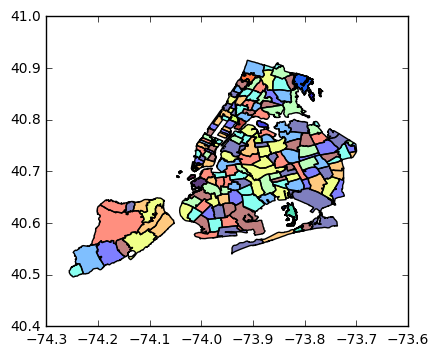

In [39]:
geo_df.plot(c=geo_df.cluster)

In [ ]:
#@Review: Missing/incomplete follwoing steps
#cluster the NUMBER OF ESTABLISHMENTS time series with K-means in **a few** clusters (as discussed there is no real good, sound way to decide what a good number is here. try a few options, keeping in mind a few is more than a couple, but i recommand you stay within the single digit numbers)
#3. plot the cluster centers (if you used K means those are the means of the clusters). you can plot for example the cluster centers overlayed on each time series (using the alpha channel to control the opacity in the plot may be helpful here).
#4. Use another clustering algorithm (of your choice)
#5. overlay your data on a NYC map: you can use shapefiles for the zip codes and different colors for different clusters
#6. Compare the results of the 2 algorithms
#7. attempt an interpretation.